# Probability Distributions
## Poisson Distribution
### Nikolas Schnellbächer (last revision 2018-10-19)

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import poisson

The Poisson distribution is a very common probability distribution to describe stochastic processes and a common distribution for general statisics. Hence it is often used as a noise model for physical processes.
We call a discrete random variable $K$ Poisson distributed, if its probability mass function (PMF) is given by
\begin{align}
p_{\mu}(k) = p(K=k;\, \mu) = \dfrac{\mu^k}{k!} e^{-\mu}  \, ,
\end{align}
where $\mu$ is the only shape parameter of this distribution. The random variable $K$ can take any discrete integer value $k\ge 0$.

Using a python environment we use scipy's built in functionality to work with Poisson distributions.
For this purpose use the 
```python
from scipy.stats import poisson
```
statement. Then you can access the probability mass function in the following way
```python
poisson.pmf(k, mu, loc)
```
where $k$ is the discrete random variable, $\mu$ the shape parameter and `loc` the location parameter of the Poisson distribution.

The central feature of the Poisson distribution is the fact, that its only shape parameter $\mu$ equals its mean and its variance.
\begin{align}
E[K] \equiv \langle k\rangle = \mu
\end{align}
and
\begin{align}
\text{Var}[K] \equiv \sigma^2 \equiv \langle k^2\rangle - \langle k\rangle^2 = \mu
\end{align}
This implies that for the Poisson distribution we also have that
\begin{align}
\dfrac{\sigma}{\mu} = \dfrac{\sqrt{\langle k^2\rangle - \langle k\rangle^2}}{\langle k\rangle} = \dfrac{\sqrt{\mu}}{\mu} = \dfrac{1}{\sqrt{\mu}} \, .
\end{align}
In comparison to other well known statistical distributions it is interesting, that the Poisson distribution can be derived from a Binomial distribution $B_{n,p}(k)=B(k;\, n, p)$ in the limit of $n\rightarrow \infty$ and $p\rightarrow 0$, such that
$np = \text{const.} =: \mu$.

## Moments of the Poisson distribution
Additionally to the mean and the variance as given above the moments of the Poisson distribution satisfy the following recursion relation
\begin{align}
\mu \dfrac{d}{d\mu} \langle k^n \rangle = \langle k^{n+1}\rangle - \mu \langle k^n \rangle
\end{align}

In [4]:
def plot_pmfs(X, muVals, labels):
    """
    plot Poisson probability mass functions
    """
    
    pColors = ['#CCCCCC', 'C0', 'C1', 'C2']
    
    f, ax = plt.subplots(1)
    f.set_size_inches(5.5, 3.5)
    
    ax.set_xlabel(r'$k$', fontsize = 18.0)
    ax.set_ylabel(r'$p(k\, ; \mu)$', fontsize = 18.0)
    ax.xaxis.labelpad = 4.0
    ax.yaxis.labelpad = 4.0 
    
    labelfontsize = 15.0
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    lineWidth = 1.5    
    
    ax.plot([-5.0, 35.0], [0.0, 0.0], 
             color = pColors[0],
             alpha = 1.0,
             lw = lineWidth,
             zorder = 2,
             dashes = [4.0, 2.0])
    
    for i in range(len(muVals)):
    
        ax.plot(X[:, 0], X[:, i + 1], 
                 color = pColors[i + 1],
                 alpha = 1.0,
                 lw = lineWidth,
                 zorder = 2,
                 label = r'')
             
        ax.scatter(X[:, 0], X[:, i + 1],
                    s = 20.0,
                    lw = lineWidth,
                    facecolor = pColors[i + 1],
                    edgecolor = 'None',
                    zorder = 11,
                    label = labels[i])
        
    leg = ax.legend(handlelength = 0.25, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1,
                    fontsize = 14.0)
    leg.draw_frame(False)
    plt.gca().add_artist(leg)
        
    ax.set_xlim(-0.5, 19.0)

    return None

CPU times: user 63.9 ms, sys: 6.26 ms, total: 70.2 ms
Wall time: 71.4 ms


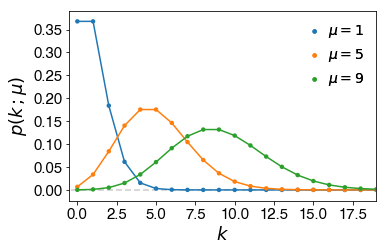

In [5]:
%%time
# create Poisson distribution
muVals = [1.0, 5.0, 9.0]   
xVals = np.arange(0, 30, 1)

X = np.zeros((len(xVals), len(muVals) + 1))
X[:, 0] = xVals

for i, mu in enumerate(muVals):

    yVals = poisson.pmf(xVals, mu)
    assert xVals.shape == yVals.shape, "Error: Shape assertion failed."
    
    X[:, i + 1] = yVals
    
labels = [r'$\mu = 1$',
          r'$\mu = 5$',
          r'$\mu = 9$']

plot_pmfs(X, muVals, labels)